# Projeto 3 - Google Play Store Apps

Ciências dos Dados

**1.Arthur Ventrilho**

**2.Gabriel Zanetti**

**3.Roger Pina**

### Etapa 1: Importando e colocando as funções que serão utilizadas

In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import mpmath
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm, probplot, t

In [63]:
# Função utilitária para fazer a regressão com constante adicionada
def regress_cp(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

def regress(X,Y):
    model = sm.OLS(Y,X)
    results = model.fit()
    return results

In [64]:
#Função que transforma colunas categóricas em colunas quantitativas
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    # Nota: se você for um econometrista, pode se interessar por usar a opção dropFirst = True na get_dummies
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name + "_")], axis=1)
    return df2

In [65]:
#Rating como saída
data = pd.read_csv('googleplaystore.csv')
data = data.dropna(axis=0)

#Install como saída
data_ = pd.read_csv('googleplaystore.csv')
data_ = data_.dropna(axis=0)

### Etapa 2: Arrumando os dados

In [66]:
del data['Genres']
del data['Last Updated']
del data['Current Ver']
del data['Android Ver']

del data_['Genres']
del data_['Last Updated']
del data_['Current Ver']
del data_['Android Ver']

In [67]:
#Tranformando Installs em quant
deletar = ['+', ',']
Installs_novo = []
Installs_novo_ = []

for frase in data['Installs']:
    for c in deletar:
        frase = frase.replace(c , "")
    Installs_novo.append(frase)
Installs_novo
data['Installs'] = pd.Series((Installs_novo), index = data.index)

for frase in data_['Installs']:
    for c in deletar:
        frase = frase.replace(c , "")
    Installs_novo_.append(frase)
Installs_novo_
data_['Installs'] = pd.Series((Installs_novo_), index = data_.index)

In [68]:
#Deixando Price em quant
deletar = ['$']
Price_novo = []
Price_novo_ = []

for frase in data['Price']:
    for c in deletar:
        frase = frase.replace(c , "")
    Price_novo.append(frase)
data['Price'] = pd.Series((Price_novo), index = data.index)

for frase in data_['Price']:
    for c in deletar:
        frase = frase.replace(c , "")
    Price_novo_.append(frase)
data_['Price'] = pd.Series((Price_novo_), index = data_.index)

In [69]:
data = data.drop(data[data.Size == "Varies with device"].index)
data_ = data_.drop(data_[data_.Size == "Varies with device"].index)

def retira_letras(DF, coluna):
    listaA = []
        
    if coluna == 'Size':
        for linha in DF[coluna]:
            if linha[-1] == 'k':
                listaA.append(int(float(linha[:-1]) * 1000))
            elif linha[-1] == 'M':
                listaA.append(int(float(linha[:-1]) * 1000000))
    DF[coluna] = pd.Series((listaA), index = DF.index)


retira_letras(data, 'Size')
retira_letras(data_, 'Size')

In [70]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone


In [71]:
def transforma_em_numero(DF):
    colunas_int = ['Reviews', 'Size', 'Installs']
    colunas_ft = ['Rating', 'Price']
    
    for coluna in colunas_ft:
        listaft = []
        for linha in DF[coluna]:
            listaft.append(float(linha))
        DF[coluna] = pd.Series((listaft), index = DF.index)
    
    for coluna in colunas_int:
        lista = []
        for linha in DF[coluna]:
            lista.append(int(linha))
        DF[coluna] = pd.Series((lista), index = DF.index)
        
transforma_em_numero(data)
transforma_em_numero(data_)

In [72]:
#Declarando Categórico para a saída Rating
data.Category = data.Category.astype('category')
data.Type = data.Type.astype('category')
data['Content Rating'] = data['Content Rating'].astype('category')

In [73]:
#Declarando Categórico para a saída Install
data_.Category = data_.Category.astype('category')
data_.Type = data_.Type.astype('category')
data_['Content Rating'] = data_['Content Rating'].astype('category')

In [74]:
#Declarando Quantitativas
quantitativas = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

### Etapa 3: Rating como saída

#### 3.1: Regressão Linear somente com as colunas quantitativas 

In [75]:
#Separando a coluna que será a saída
quant = quantitativas.copy()
quant.remove('Rating')

In [76]:
#Fazendo a regressão
results = regress_cp(data.loc[:, quant], data.Rating)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     21.74
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           7.33e-18
Time:                        16:12:17   Log-Likelihood:                -6221.9
No. Observations:                7723   AIC:                         1.245e+04
Df Residuals:                    7718   BIC:                         1.249e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1328      0.009    476.509      0.000       4.116       4.150
Reviews     1.796e-08   4.31e-09      4.164      0.000     9.5e-09    2.64e-08
Size        1.577e-09   2.71e-10      5.819      0.000    1.05e-09    2.11e-09
Installs    3.215e-11   1.58e-10      0.204      0.838   -2.77e-10    3.41e-10
Price         -0.0006      0.000     -1.667      0.096      -0.001       0.000
==============================================================================
Omnibus:                     2752.071   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11889.252
Skew:                          -1.708   Prob(JB):                         0.00
Kurtosis:                       8.028   Cond. No.                     7.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analisando os dados podemos concluir que os resíduos da nossa regressão linear não seguem uma distribuição normal, isso foi visto através da Prob(Omnibus) e Prob(JB) que foram altas, com isso não podemos confiar no p-value. 

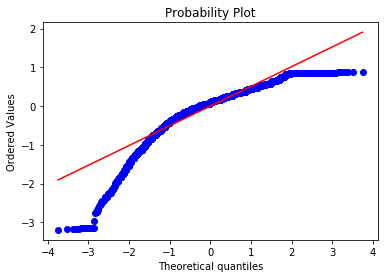

In [77]:
#Justificativa do que foi afirmado acima
probplot(results.resid, dist="norm", plot=plt);

#### 3.2: Tirando a constante da regressão linear

In [78]:
#Fazendo a regressão
results = regress(data.loc[:, quant], data.Rating)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     1903.
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        16:12:23   Log-Likelihood:                -19409.
No. Observations:                7723   AIC:                         3.883e+04
Df Residuals:                    7719   BIC:                         3.885e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Reviews     -1.39e-07   2.37e-08     -5.863      0.000   -1.86e-07   -9.26e-08
Size        9.065e-08   1.08e-09     83.803      0.000    8.85e-08    9.28e-08
Installs    3.943e-09   8.68e-10      4.540      0.000    2.24e-09    5.64e-09
Price          0.0103      0.002      5.276      0.000       0.006       0.014
==============================================================================
Omnibus:                     1439.144   Durbin-Watson:                   0.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2401.111
Skew:                          -1.258   Prob(JB):                         0.00
Kurtosis:                       4.063   Cond. No.                     2.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3.3: Transformando as colunas categóricas em quantitativas

In [79]:
#Covertendo Category
cat = dummify(data, "Category")

In [80]:
quant.extend(['Category__ART_AND_DESIGN', 'Category__AUTO_AND_VEHICLES','Category__BEAUTY', 'Category__BOOKS_AND_REFERENCE',
       'Category__BUSINESS', 'Category__COMICS', 'Category__COMMUNICATION','Category__DATING', 'Category__EDUCATION', 'Category__ENTERTAINMENT',
       'Category__EVENTS', 'Category__FAMILY', 'Category__FINANCE','Category__FOOD_AND_DRINK', 'Category__GAME',
       'Category__HEALTH_AND_FITNESS', 'Category__HOUSE_AND_HOME','Category__LIBRARIES_AND_DEMO', 'Category__LIFESTYLE',
       'Category__MAPS_AND_NAVIGATION', 'Category__MEDICAL','Category__NEWS_AND_MAGAZINES', 'Category__PARENTING',
       'Category__PERSONALIZATION', 'Category__PHOTOGRAPHY','Category__PRODUCTIVITY', 'Category__SHOPPING', 'Category__SOCIAL',
       'Category__SPORTS', 'Category__TOOLS', 'Category__TRAVEL_AND_LOCAL','Category__VIDEO_PLAYERS', 'Category__WEATHER'])

In [81]:
#Fazendo a regressão somente com as categóricas da coluna "Category"
results1 = regress(cat.loc[:, quant], cat.Rating)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.495
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           1.75e-43
Time:                        16:12:24   Log-Likelihood:                -6114.5
No. Observations:                7723   AIC:                         1.230e+04
Df Residuals:                    7686   BIC:                         1.256e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Reviews                        1.716e-08   4.29e-09      4.000      0.000    8.75e-09    2.56e-08
Size                           1.065e-09   2.99e-10      3.563      0.000    4.79e-10    1.65e-09
Installs                       4.803e-11   1.57e-10      0.306      0.759   -2.59e-10    3.55e-10
Price                            -0.0005      0.000     -1.494      0.135      -0.001       0.000
Category__ART_AND_DESIGN          4.3669      0.070     62.028      0.000       4.229       4.505
Category__AUTO_AND_VEHICLES       4.1244      0.068     60.872      0.000       3.992       4.257
Category__BEAUTY                  4.2753      0.088     48.508      0.000       4.103       4.448
Category__BOOKS_AND_REFERENCE     4.3044      0.045     96.039      0.000       4.217       4.392
Category__BUSINESS                4.1036      0.034    119.215      0.000       4.036       4.171
Category__COMICS                  4.1164      0.077     53.752      0.000       3.966       4.266
Category__COMMUNICATION           4.0790      0.037    109.885      0.000       4.006       4.152
Category__DATING                  3.9379      0.041     95.890      0.000       3.857       4.018
Category__EDUCATION               4.3640      0.051     84.876      0.000       4.263       4.465
Category__ENTERTAINMENT           4.1201      0.057     72.523      0.000       4.009       4.231
Category__EVENTS                  4.4635      0.087     51.332      0.000       4.293       4.634
Category__FAMILY                  4.1557      0.016    259.049      0.000       4.124       4.187
Category__FINANCE                 4.0963      0.033    122.432      0.000       4.031       4.162
Category__FOOD_AND_DRINK          4.0709      0.059     69.170      0.000       3.956       4.186
Category__GAME                    4.1961      0.022    192.013      0.000       4.153       4.239
Category__HEALTH_AND_FITNESS      4.1971      0.037    114.764      0.000       4.125       4.269
Category__HOUSE_AND_HOME          4.1433      0.072     57.762      0.000       4.003       4.284
Category__LIBRARIES_AND_DEMO      4.1911      0.069     61.049      0.000       4.056       4.326
Category__LIFESTYLE               4.0803      0.032    125.850      0.000       4.017       4.144
Category__MAPS_AND_NAVIGATION     3.9944      0.055     72.400      0.000       3.886       4.103
Category__MEDICAL                 4.1651      0.030    137.341      0.000       4.106       4.225
Category__NEWS_AND_MAGAZINES      4.1276      0.042     99.381      0.000       4.046       4.209
Category__PARENTING               4.3244      0.081     53.411      0.000       4.166       4.483
Category__PERSONALIZATION         4.3089      0.032    133.429      0.000       4.246       4.372
Category__PHOTOGRAPHY             4.1224     

In [82]:
#Covertendo Type
tp = dummify(cat, "Type")
tp_ = dummify(data, "Type")

In [83]:
#Separando a coluna que será a saída
quants = quantitativas.copy()
quants.remove('Rating')

In [84]:
quant.extend(['Type__Free','Type__Paid'])
quants.extend(['Type__Free','Type__Paid'])

In [85]:
#Adicionando as colunas categóricas da coluna "Type" na regressão
results2 = regress(tp.loc[:, quant], tp.Rating)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.698
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           5.40e-46
Time:                        16:12:25   Log-Likelihood:                -6106.8
No. Observations:                7723   AIC:                         1.229e+04
Df Residuals:                    7685   BIC:                         1.255e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Reviews                        1.751e-08   4.29e-09      4.085      0.000    9.11e-09    2.59e-08
Size                           1.091e-09   2.99e-10      3.654      0.000    5.06e-10    1.68e-09
Installs                       6.135e-11   1.57e-10      0.392      0.695   -2.46e-10    3.69e-10
Price                            -0.0009      0.000     -2.363      0.018      -0.002      -0.000
Category__ART_AND_DESIGN          0.4431      0.069      6.446      0.000       0.308       0.578
Category__AUTO_AND_VEHICLES       0.2053      0.066      3.109      0.002       0.076       0.335
Category__BEAUTY                  0.3564      0.086      4.152      0.000       0.188       0.525
Category__BOOKS_AND_REFERENCE     0.3809      0.044      8.629      0.000       0.294       0.467
Category__BUSINESS                0.1809      0.034      5.286      0.000       0.114       0.248
Category__COMICS                  0.1975      0.075      2.643      0.008       0.051       0.344
Category__COMMUNICATION           0.1516      0.037      4.110      0.000       0.079       0.224
Category__DATING                  0.0178      0.040      0.441      0.659      -0.061       0.097
Category__EDUCATION               0.4415      0.050      8.782      0.000       0.343       0.540
Category__ENTERTAINMENT           0.1998      0.055      3.603      0.000       0.091       0.308
Category__EVENTS                  0.5446      0.085      6.429      0.000       0.379       0.711
Category__FAMILY                  0.2278      0.016     14.266      0.000       0.197       0.259
Category__FINANCE                 0.1756      0.033      5.299      0.000       0.111       0.241
Category__FOOD_AND_DRINK          0.1506      0.057      2.626      0.009       0.038       0.263
Category__GAME                    0.2682      0.021     13.002      0.000       0.228       0.309
Category__HEALTH_AND_FITNESS      0.2745      0.036      7.648      0.000       0.204       0.345
Category__HOUSE_AND_HOME          0.2243      0.070      3.206      0.001       0.087       0.361
Category__LIBRARIES_AND_DEMO      0.2722      0.067      4.058      0.000       0.141       0.404
Category__LIFESTYLE               0.1582      0.032      4.897      0.000       0.095       0.221
Category__MAPS_AND_NAVIGATION     0.0715      0.054      1.324      0.186      -0.034       0.177
Category__MEDICAL                 0.2241      0.030      7.379      0.000       0.165       0.284
Category__NEWS_AND_MAGAZINES      0.2073      0.041      5.051      0.000       0.127       0.288
Category__PARENTING               0.4032      0.079      5.118      0.000       0.249       0.558
Category__PERSONALIZATION         0.3684      0.033     11.315      0.000       0.305       0.432
Category__PHOTOGRAPHY             0.1972     

In [86]:
#Fazendo a regressão somente com as categóricas da coluna "Type"
results4 = regress(tp_.loc[:, quants], tp_.Rating)
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     21.61
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           1.49e-21
Time:                        16:12:25   Log-Likelihood:                -6211.5
No. Observations:                7723   AIC:                         1.244e+04
Df Residuals:                    7717   BIC:                         1.248e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Reviews     1.826e-08   4.31e-09      4.239      0.000    9.81e-09    2.67e-08
Size        1.592e-09   2.71e-10      5.884      0.000    1.06e-09    2.12e-09
Installs    4.981e-11   1.58e-10      0.316      0.752   -2.59e-10    3.59e-10
Price         -0.0010      0.000     -2.665      0.008      -0.002      -0.000
Type__Free     4.1244      0.009    465.812      0.000       4.107       4.142
Type__Paid     4.2345      0.024    177.382      0.000       4.188       4.281
==============================================================================
Omnibus:                     2768.982   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12069.622
Skew:                          -1.716   Prob(JB):                         0.00
Kurtosis:                       8.072   Cond. No.                     2.01e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
#Covertendo Content Rating
df = dummify(tp, "Content Rating")

In [88]:
quant.extend(['Content Rating__Adults only 18+', 'Content Rating__Everyone','Content Rating__Everyone 10+', 'Content Rating__Mature 17+',
       'Content Rating__Teen', 'Content Rating__Unrated'])

In [89]:
#Refazendo a regressao após adicionar todas as categóricas que foram transformadas em quant
results3 = regress(df.loc[:, quant], data.Rating)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     7.711
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           4.38e-44
Time:                        16:12:26   Log-Likelihood:                -6105.7
No. Observations:                7723   AIC:                         1.230e+04
Df Residuals:                    7680   BIC:                         1.260e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Reviews                          1.753e-08   4.33e-09      4.051      0.000    9.05e-09     2.6e-08
Size                             1.077e-09   3.01e-10      3.582      0.000    4.87e-10    1.67e-09
Installs                         5.861e-11   1.57e-10      0.374      0.709   -2.49e-10    3.66e-10
Price                              -0.0009      0.000     -2.367      0.018      -0.002      -0.000
Category__ART_AND_DESIGN            0.3893      0.069      5.645      0.000       0.254       0.525
Category__AUTO_AND_VEHICLES         0.1523      0.066      2.297      0.022       0.022       0.282
Category__BEAUTY                    0.3032      0.086      3.526      0.000       0.135       0.472
Category__BOOKS_AND_REFERENCE       0.3273      0.044      7.359      0.000       0.240       0.414
Category__BUSINESS                  0.1279      0.035      3.680      0.000       0.060       0.196
Category__COMICS                    0.1327      0.075      1.764      0.078      -0.015       0.280
Category__COMMUNICATION             0.0977      0.037      2.622      0.009       0.025       0.171
Category__DATING                   -0.0193      0.052     -0.375      0.707      -0.120       0.082
Category__EDUCATION                 0.3884      0.051      7.677      0.000       0.289       0.488
Category__ENTERTAINMENT             0.1382      0.057      2.444      0.015       0.027       0.249
Category__EVENTS                    0.4894      0.085      5.767      0.000       0.323       0.656
Category__FAMILY                    0.1729      0.017     10.266      0.000       0.140       0.206
Category__FINANCE                   0.1227      0.034      3.642      0.000       0.057       0.189
Category__FOOD_AND_DRINK            0.0970      0.058      1.683      0.092      -0.016       0.210
Category__GAME                      0.2111      0.022      9.720      0.000       0.168       0.254
Category__HEALTH_AND_FITNESS        0.2214      0.036      6.101      0.000       0.150       0.293
Category__HOUSE_AND_HOME            0.1710      0.070      2.436      0.015       0.033       0.309
Category__LIBRARIES_AND_DEMO        0.2195      0.067      3.258      0.001       0.087       0.351
Category__LIFESTYLE                 0.1045      0.033      3.192      0.001       0.040       0.169
Category__MAPS_AND_NAVIGATION       0.0186      0.054      0.342      0.732      -0.088       0.125
Category__MEDICAL                   0.1713      0.031      5.541      0.000       0.111       0.232
Category__NEWS_AND_MAGAZINES        0.1511      0.042      3.617      0.000       0.069       0.233
Category__PARENTING                 0.3506      0.079      4.439      0.000       0.196       0.505
Category__PERSONALIZATION           0.3146      0.033      9.534      0.000       0

In [90]:
quant.remove('Installs')
quant.remove('Category__DATING')
quant.remove('Category__MAPS_AND_NAVIGATION')
quant.remove('Category__TOOLS')

results = regress(df.loc[:, quant], data.Rating)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.291
Date:                Mon, 19 Nov 2018   Prob (F-statistic):           2.40e-45
Time:                        16:12:26   Log-Likelihood:                -6106.0
No. Observations:                7723   AIC:                         1.229e+04
Df Residuals:                    7683   BIC:                         1.257e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Reviews                           1.85e-08   3.45e-09      5.356      0.000    1.17e-08    2.53e-08
Size                             1.077e-09      3e-10      3.587      0.000    4.88e-10    1.67e-09
Price                              -0.0009      0.000     -2.371      0.018      -0.002      -0.000
Category__ART_AND_DESIGN            0.3753      0.073      5.164      0.000       0.233       0.518
Category__AUTO_AND_VEHICLES         0.1381      0.070      1.972      0.049       0.001       0.275
Category__BEAUTY                    0.2895      0.090      3.221      0.001       0.113       0.466
Category__BOOKS_AND_REFERENCE       0.3134      0.048      6.490      0.000       0.219       0.408
Category__BUSINESS                  0.1138      0.039      2.926      0.003       0.038       0.190
Category__COMICS                    0.1208      0.079      1.526      0.127      -0.034       0.276
Category__COMMUNICATION             0.0848      0.041      2.058      0.040       0.004       0.166
Category__EDUCATION                 0.3747      0.054      6.891      0.000       0.268       0.481
Category__ENTERTAINMENT             0.1263      0.060      2.090      0.037       0.008       0.245
Category__EVENTS                    0.4754      0.089      5.354      0.000       0.301       0.649
Category__FAMILY                    0.1594      0.024      6.756      0.000       0.113       0.206
Category__FINANCE                   0.1085      0.038      2.859      0.004       0.034       0.183
Category__FOOD_AND_DRINK            0.0830      0.061      1.351      0.177      -0.037       0.203
Category__GAME                      0.1988      0.028      7.169      0.000       0.144       0.253
Category__HEALTH_AND_FITNESS        0.2079      0.040      5.136      0.000       0.129       0.287
Category__HOUSE_AND_HOME            0.1569      0.074      2.122      0.034       0.012       0.302
Category__LIBRARIES_AND_DEMO        0.2053      0.071      2.891      0.004       0.066       0.344
Category__LIFESTYLE                 0.0907      0.037      2.450      0.014       0.018       0.163
Category__MEDICAL                   0.1574      0.035      4.454      0.000       0.088       0.227
Category__NEWS_AND_MAGAZINES        0.1394      0.046      3.057      0.002       0.050       0.229
Category__PARENTING                 0.3367      0.083      4.067      0.000       0.174       0.499
Category__PERSONALIZATION           0.3010      0.037      8.097      0.000       0.228       0.374
Category__PHOTOGRAPHY               0.1304      0.039      3.306      0.001       0.053       0.208
Category__PRODUCTIVITY              0.1353      0.040      3.423      0.001       0.058       0.213
Category__SHOPPING                  0.2161      0.044      4.894      0.000       0

### Etapa 4: Install como saída


#### 4.1: Regressão Linear somente com as colunas quantitativas 

In [91]:
#Declarando Quantitativas
quantitativas = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

In [92]:
#Separando a coluna que será a saída
quant_ = quantitativas.copy()
quant_.remove('Installs')

In [93]:
#Fazendo a regressão
resultado = regress_cp(data_.loc[:, quant_], data_.Installs)
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1246.
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               0.00
Time:                        16:12:27   Log-Likelihood:            -1.4597e+05
No. Observations:                7723   AIC:                         2.919e+05
Df Residuals:                    7718   BIC:                         2.920e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.171e+06   3.45e+06      0.629      0.530    -4.6e+06    8.94e+06
Rating      1.676e+05   8.22e+05      0.204      0.838   -1.44e+06    1.78e+06
Reviews       16.7632      0.246     68.014      0.000      16.280      17.246
Size           0.0272      0.020      1.386      0.166      -0.011       0.066
Price      -1.192e+04   2.56e+04     -0.466      0.641   -6.21e+04    3.82e+04
==============================================================================
Omnibus:                    12546.497   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29248589.092
Skew:                          10.163   Prob(JB):                         0.00
Kurtosis:                     303.799   Cond. No.                     2.62e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

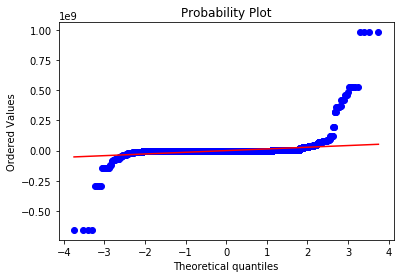

In [94]:
#Analisando graficamente
probplot(resultado.resid, dist="norm", plot=plt);

O gráfico acima nos permite afirmar que os resíduos dessa regressão linear seguem uma distribuição normal

#### 4.2: Tirando a constante da regressão linear

In [95]:
#Fazendo a regressão
resultado1 = regress(data_.loc[:, quant_], data_.Installs)
resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Installs   R-squared:                      -6.726
Model:                            OLS   Adj. R-squared:                 -6.730
Method:                 Least Squares   F-statistic:                    -1680.
Date:                Mon, 19 Nov 2018   Prob (F-statistic):               1.00
Time:                        16:12:28   Log-Likelihood:            -1.4597e+05
No. Observations:                7723   AIC:                         2.919e+05
Df Residuals:                    7719   BIC:                         2.920e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rating      6.756e+05   1.49e+05      4.540      0.000    3.84e+05    9.67e+05
Reviews       16.7522      0.246     68.143      0.000      16.270      17.234
Size           0.0279      0.020      1.426      0.154      -0.010       0.066
Price      -1.143e+04   2.56e+04     -0.447      0.655   -6.15e+04    3.87e+04
==============================================================================
Omnibus:                    12549.543   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29258457.434
Skew:                          10.169   Prob(JB):                         0.00
Kurtosis:                     303.849   Cond. No.                     1.10e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OBS: Observamos que essa regressão é impossível de ser feita dado que o Re2 deu um número negativo